<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 80ms/step - accuracy: 0.3988 - loss: 1.6393 - val_accuracy: 0.6166 - val_loss: 1.0716
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 78ms/step - accuracy: 0.6518 - loss: 0.9902 - val_accuracy: 0.6876 - val_loss: 0.8842
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 80ms/step - accuracy: 0.7166 - loss: 0.8107 - val_accuracy: 0.6954 - val_loss: 0.8571
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 77ms/step - accuracy: 0.7581 - loss: 0.6941 - val_accuracy: 0.7287 - val_loss: 0.7991
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - accuracy: 0.7967 - loss: 0.5860 - val_accuracy: 0.7294 - val_loss: 0.7907
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.8235 - loss: 0.5058 - val_accuracy: 0.7389 - val_loss: 0.7902
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 77ms/step - accuracy: 0.8479 - loss: 0.4269 - val_accuracy: 0.7396 - val_loss: 0.8162
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 

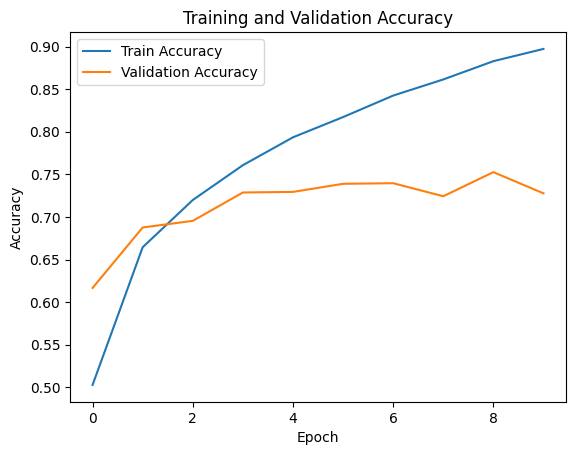

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
